In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv("/content/enhanced_fake_review_dataset.csv")
# Convert date column to datetime format
df['Review_Date'] = pd.to_datetime(df['Review_Date'])

# Convert categorical columns to category type
df['Label'] = df['Label'].astype('category')
df['Product_Name'] = df['Product_Name'].astype('category')

# Handle missing values (if any)
print(df.isnull().sum())  # check for null values

# Optional: fill missing values or drop rows
df = df.fillna(method='ffill')  # forward fill
df = df.dropna()  # drop missing rows

print(df.dtypes)
print(df.head())


Review_ID              0
Product_Name           0
Review_Text            0
Label                  0
Review_Date            0
Reviewer_Location      0
Review_Word_Count      0
Review_Char_Count      0
Sentiment_Polarity     0
Review_DayOfWeek       0
Reviewer_City          0
Reviewer_Country       0
Label_Encoded          0
Is_Duplicate_Review    0
dtype: int64
Review_ID                       int64
Product_Name                 category
Review_Text                    object
Label                        category
Review_Date            datetime64[ns]
Reviewer_Location              object
Review_Word_Count               int64
Review_Char_Count               int64
Sentiment_Polarity            float64
Review_DayOfWeek               object
Reviewer_City                  object
Reviewer_Country               object
Label_Encoded                   int64
Is_Duplicate_Review              bool
dtype: object
   Review_ID       Product_Name  \
0          1    Smartphone Case   
1          2  Bluetoo

<ipython-input-6-82120bf44060>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # forward fill


In [ ]:


# 1. Remove duplicate rows (especially duplicate reviews)
df = df.drop_duplicates()

# 2. Strip leading/trailing whitespace from text columns
df['Review_Text'] = df['Review_Text'].astype(str).str.strip()

# 3. Drop rows with any missing (NaN) values
df = df.dropna()

# 4. Reset index after dropping rows
df = df.reset_index(drop=True)

# 5. Clean column names (replace spaces with underscores, just in case)
df.columns = df.columns.str.strip().str.replace(" ", "_")

# 6. Check for null values and duplicates after cleaning
print("Missing values per column:\n", df.isnull().sum())
print("Total Duplicates:", df.duplicated().sum())

# 7. Preview the cleaned data
print(df.head())


Missing values per column:
 Review_ID              0
Product_Name           0
Review_Text            0
Label                  0
Review_Date            0
Reviewer_Location      0
Review_Word_Count      0
Review_Char_Count      0
Sentiment_Polarity     0
Review_DayOfWeek       0
Reviewer_City          0
Reviewer_Country       0
Label_Encoded          0
Is_Duplicate_Review    0
dtype: int64
Total Duplicates: 0
   Review_ID       Product_Name  \
0          1    Smartphone Case   
1          2  Bluetooth Speaker   
2          3         Smartwatch   
3          4       Gaming Mouse   
4          5  Bluetooth Speaker   

                                         Review_Text    Label Review_Date  \
0  I can't believe how amazing it is. An unbeliev...     Fake  2025-08-12   
1  Exceeded my expectations in every way. The qua...  Genuine  2025-12-14   
2  So flawless it defies logic. This product is p...     Fake  2025-04-08   
3  Exceeded my expectations in every way. I'm rea...  Genuine  2025-04

In [ ]:
from sklearn.model_selection import train_test_split

# Select features (X) and label (y)
X = df[['Review_Word_Count', 'Review_Char_Count', 'Sentiment_Polarity']]
y = df['Label_Encoded']

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (8000, 3)
X_test shape: (2000, 3)
y_train shape: (8000,)
y_test shape: (2000,)


In [ ]:
# Summary statistics for numeric columns
print(df.describe())

# Data types
print(df.dtypes)

# Class distribution
print("Label Distribution:\n", df['Label'].value_counts())

# Distribution of reviews across products
print("Top 5 Most Reviewed Products:\n", df['Product_Name'].value_counts().head())

# Days when most reviews were posted
print("Reviews by Day of Week:\n", df['Review_DayOfWeek'].value_counts())
# Average word count by label
print("Average Word Count by Label:\n", df.groupby("Label")["Review_Word_Count"].mean())

# Average sentiment by label
print("Average Sentiment by Label:\n", df.groupby("Label")["Sentiment_Polarity"].mean())


         Review_ID                 Review_Date  Review_Word_Count  \
count  10000.00000                       10000       10000.000000   
mean    5000.50000  2025-07-01 23:50:55.680000          12.792500   
min        1.00000         2025-01-01 00:00:00           8.000000   
25%     2500.75000         2025-04-02 00:00:00          10.000000   
50%     5000.50000         2025-07-03 00:00:00          13.000000   
75%     7500.25000         2025-09-30 00:00:00          14.000000   
max    10000.00000         2025-12-30 00:00:00          18.000000   
std     2886.89568                         NaN           2.539033   

       Review_Char_Count  Sentiment_Polarity  Label_Encoded  
count       10000.000000        10000.000000   10000.000000  
mean           81.946500            0.561604       0.501200  
min            57.000000           -0.250000       0.000000  
25%            68.000000            0.375000       0.000000  
50%            80.000000            0.500000       1.000000  
75%   

<ipython-input-10-97650be6f58b>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print("Average Word Count by Label:\n", df.groupby("Label")["Review_Word_Count"].mean())
<ipython-input-10-97650be6f58b>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print("Average Sentiment by Label:\n", df.groupby("Label")["Sentiment_Polarity"].mean())


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# --- Logistic Regression ---
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

log_accuracy = accuracy_score(y_test, log_preds)
print("📊 Logistic Regression Accuracy:", log_accuracy)

# --- Decision Tree Classifier ---
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree_preds = tree_model.predict(X_test)

tree_accuracy = accuracy_score(y_test, tree_preds)
print("🌳 Decision Tree Accuracy:", tree_accuracy)


📊 Logistic Regression Accuracy: 0.824
🌳 Decision Tree Accuracy: 1.0


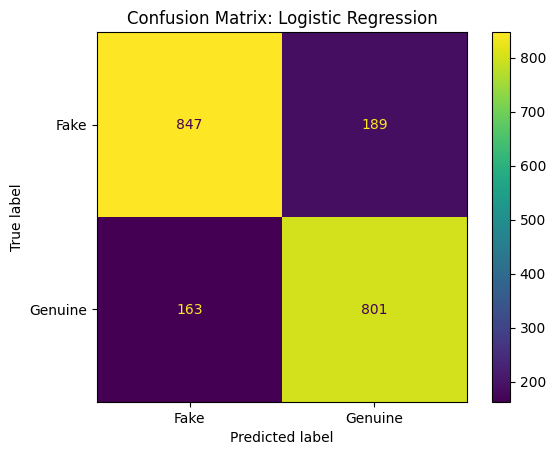

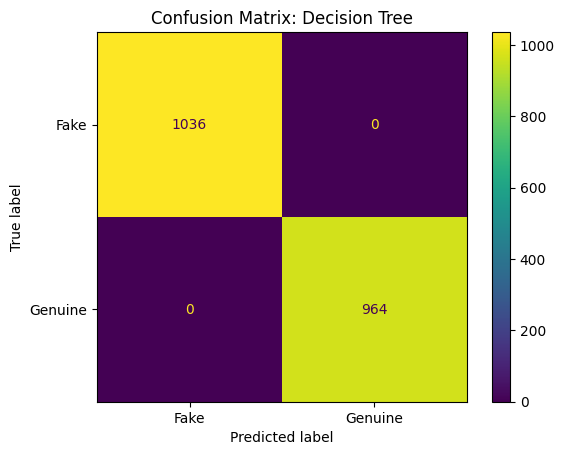

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# --- Logistic Regression Confusion Matrix ---
cm_log = confusion_matrix(y_test, log_preds)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=["Fake", "Genuine"])
disp_log.plot()
plt.title("Confusion Matrix: Logistic Regression")
plt.show()

# --- Decision Tree Confusion Matrix ---
cm_tree = confusion_matrix(y_test, tree_preds)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=["Fake", "Genuine"])
disp_tree.plot()
plt.title("Confusion Matrix: Decision Tree")
plt.show()


Explained variance ratio: [0.99580905 0.00399819]


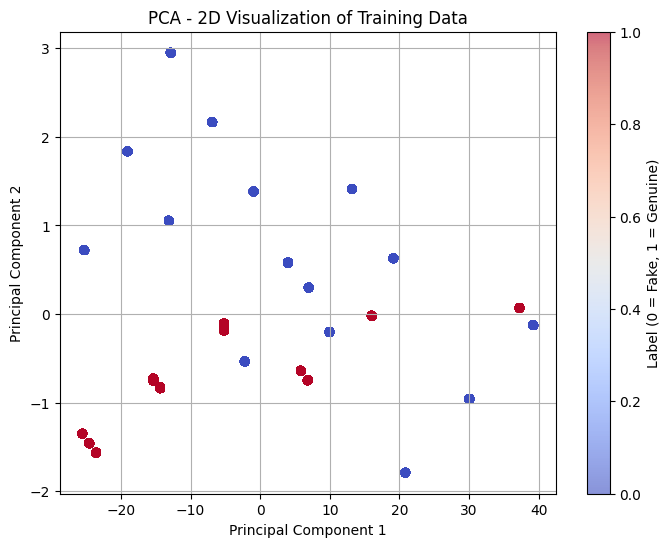

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Explained variance tells how much info each component retains
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Visualize the 2D projection
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='coolwarm', alpha=0.6)
plt.xlabel("Principal Component 1")plt.ylabel("Principal Component 2")
plt.title("PCA - 2D Visualization of Training Data")
plt.colorbar(label='Label (0 = Fake, 1 = Genuine)')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression

# --- L2 Regularization (Ridge) ---
log_reg_l2 = LogisticRegression(penalty='l2', C=1.0)  # C is inverse of regularization strength
log_reg_l2.fit(X_train, y_train)
l2_accuracy = log_reg_l2.score(X_test, y_test)
print("🔒 L2 Regularized Logistic Regression Accuracy:", l2_accuracy)

# --- L1 Regularization (Lasso) ---
log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
log_reg_l1.fit(X_train, y_train)
l1_accuracy = log_reg_l1.score(X_test, y_test)
print("🔒 L1 Regularized Logistic Regression Accuracy:", l1_accuracy)


🔒 L2 Regularized Logistic Regression Accuracy: 0.824
🔒 L1 Regularized Logistic Regression Accuracy: 0.824


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


🧮 Regression Equation: y = -0.0931 * x + 1.6921


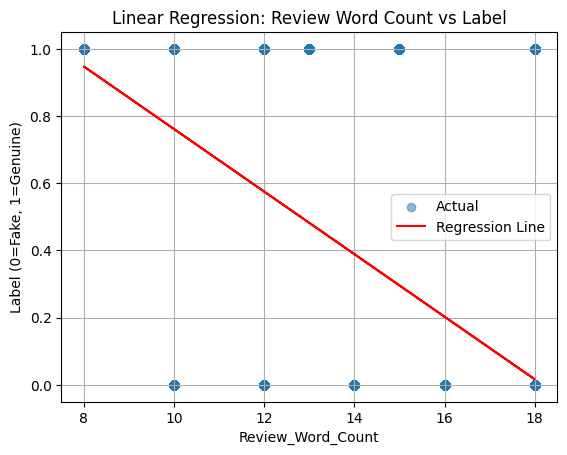

In [ ]:
from sklearn.linear_model import LinearRegression

# Use one feature: Review_Word_Count
X_single = df[['Review_Word_Count']]
y = df['Label_Encoded']

# Fit the model
linear_model = LinearRegression()
linear_model.fit(X_single, y)

# Get slope and intercept
slope = linear_model.coef_[0]
intercept = linear_model.intercept_

print(f"🧮 Regression Equation: y = {slope:.4f} * x + {intercept:.4f}")
import matplotlib.pyplot as plt

plt.scatter(X_single, y, alpha=0.5, label='Actual')
plt.plot(X_single, linear_model.predict(X_single), color='red', label='Regression Line')
plt.xlabel('Review_Word_Count')
plt.ylabel('Label (0=Fake, 1=Genuine)')
plt.title('Linear Regression: Review Word Count vs Label')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
!pip install xgboost  # Run only once if not already installed


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Create and train the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predict on test set
xgb_preds = xgb_model.predict(X_test)

# Accuracy
xgb_accuracy = accuracy_score(y_test, xgb_preds)
print("⚡ XGBoost Accuracy:", xgb_accuracy)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:05:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


⚡ XGBoost Accuracy: 1.0


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Convert predictions and labels to float for regression metrics
y_pred = xgb_preds.astype(float)
y_true = y_test.astype(float)

# MSE
mse = mean_squared_error(y_true, y_pred)
print("📉 Mean Squared Error (MSE):", mse)

# RMSE
rmse = np.sqrt(mse)
print("📏 Root Mean Squared Error (RMSE):", rmse)

# R² Score
r2 = r2_score(y_true, y_pred)
print("📊 R-squared (R²):", r2)


📉 Mean Squared Error (MSE): 0.0
📏 Root Mean Squared Error (RMSE): 0.0
📊 R-squared (R²): 1.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])  # Line: y = 2x

# Initialize m (slope) and b (intercept)
m = 0
b = 0

# Learning rate
lr = 0.01

# Number of iterations
epochs = 1000

# Gradient Descent Loop
for i in range(epochs):
    y_pred = m * X + b
    error = y - y_pred

    # Compute gradients
    m_grad = -2 * np.mean(X * error)
    b_grad = -2 * np.mean(error)

    # Update parameters
    m = m - lr * m_grad
    b = b - lr * b_grad

    # Optionally print every 100 steps
    if i % 100 == 0:
        print(f"Epoch {i}: m = {m:.4f}, b = {b:.4f}, loss = {np.mean(error ** 2):.4f}")

print(f"\n🔽 Final: y = {m:.4f}x + {b:.4f}")


Epoch 0: m = 0.4400, b = 0.1200, loss = 44.0000
Epoch 100: m = 1.8988, b = 0.3655, loss = 0.0245
Epoch 200: m = 1.9279, b = 0.2605, loss = 0.0124
Epoch 300: m = 1.9486, b = 0.1856, loss = 0.0063
Epoch 400: m = 1.9634, b = 0.1323, loss = 0.0032
Epoch 500: m = 1.9739, b = 0.0943, loss = 0.0016
Epoch 600: m = 1.9814, b = 0.0672, loss = 0.0008
Epoch 700: m = 1.9867, b = 0.0479, loss = 0.0004
Epoch 800: m = 1.9905, b = 0.0341, loss = 0.0002
Epoch 900: m = 1.9933, b = 0.0243, loss = 0.0001

🔽 Final: y = 1.9952x + 0.0174


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Vectorize the review text
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Review_Text'])  # Now X is a 2D matrix of features
y = df['Label_Encoded']

log_model = LogisticRegression()
scores = []

# Manual Cross-Validation loop (3 iterations)
for i in range(3):
    X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X, y, test_size=0.3, random_state=i)
    log_model.fit(X_train_cv, y_train_cv)
    preds = log_model.predict(X_test_cv)
    acc = accuracy_score(y_test_cv, preds)
    scores.append(acc)
    print(f"🔁 Iteration {i+1} Accuracy: {acc:.4f}")

print("\n✅ Average CV Accuracy:", np.mean(scores))


🔁 Iteration 1 Accuracy: 1.0000
🔁 Iteration 2 Accuracy: 1.0000
🔁 Iteration 3 Accuracy: 1.0000

✅ Average CV Accuracy: 1.0


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


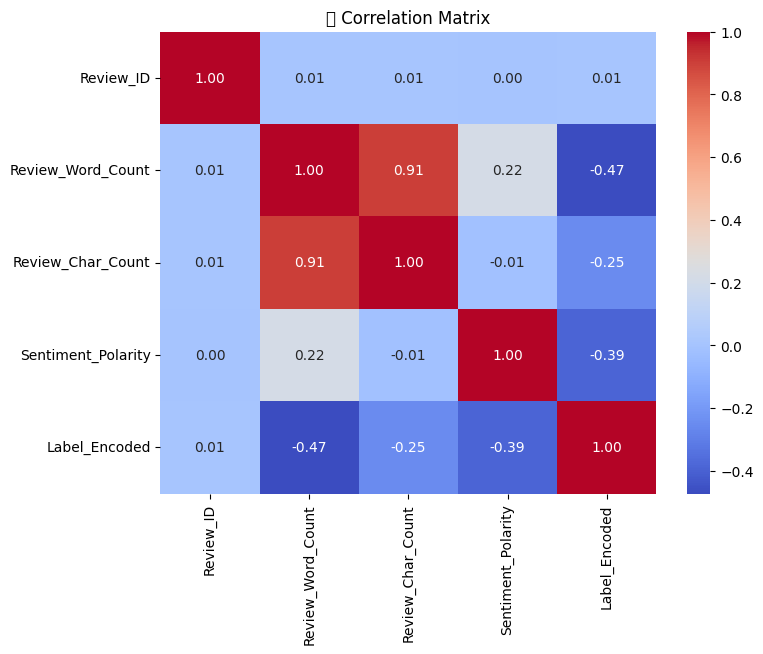

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Keep only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
correlation_matrix = numeric_df.corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("📊 Correlation Matrix")
plt.show()


In [ ]:
# Covariance matrix
cov_matrix = numeric_df.cov()
print("📉 Covariance Matrix:\n", cov_matrix)


📉 Covariance Matrix:
                        Review_ID  Review_Word_Count  Review_Char_Count  \
Review_ID           8.334167e+06          75.198770         463.422192   
Review_Word_Count   7.519877e+01           6.446688          38.358635   
Review_Char_Count   4.634222e+02          38.358635         277.553193   
Sentiment_Polarity  3.518264e+00           0.156682          -0.070694   
Label_Encoded       1.207001e+01          -0.600161          -2.074193   

                    Sentiment_Polarity  Label_Encoded  
Review_ID                     3.518264      12.070007  
Review_Word_Count             0.156682      -0.600161  
Review_Char_Count            -0.070694      -2.074193  
Sentiment_Polarity            0.081153      -0.055750  
Label_Encoded                -0.055750       0.250024  


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


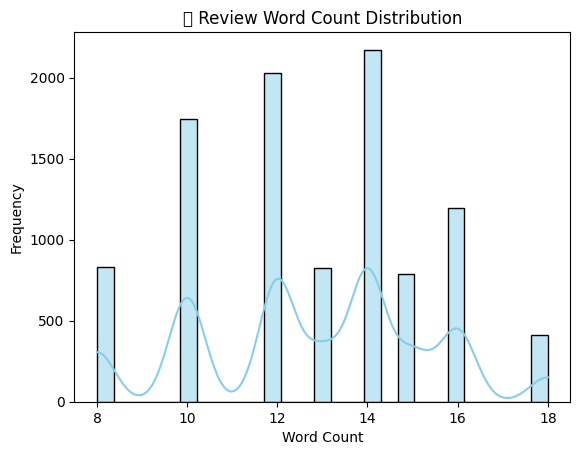

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128292 (\N{INPUT SYMBOL FOR LATIN LETTERS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


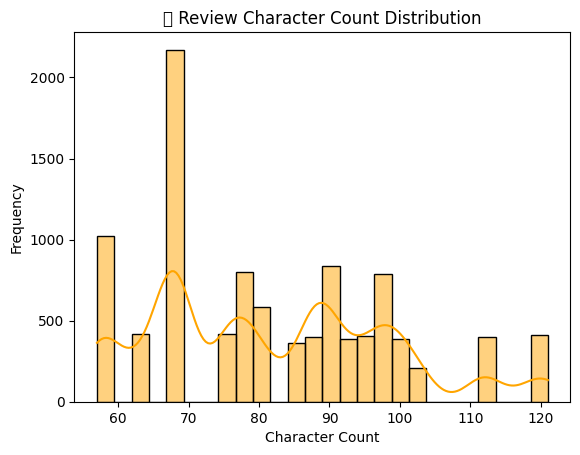

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


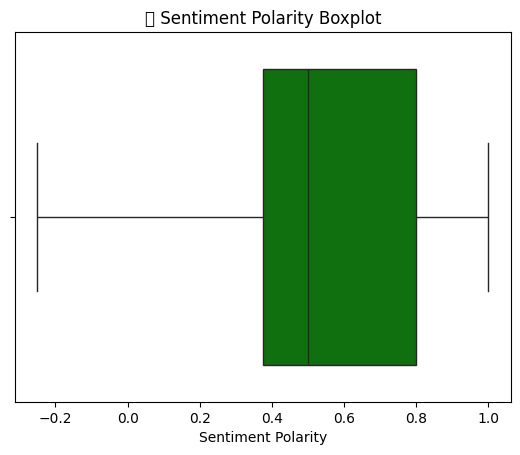

In [ ]:
# Review Word Count Distribution
sns.histplot(df['Review_Word_Count'], kde=True, color='skyblue')
plt.title("📝 Review Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

# Review Character Count
sns.histplot(df['Review_Char_Count'], kde=True, color='orange')
plt.title("🔤 Review Character Count Distribution")
plt.xlabel("Character Count")
plt.ylabel("Frequency")
plt.show()

# Sentiment Polarity
sns.boxplot(x=df['Sentiment_Polarity'], color='green')
plt.title("📈 Sentiment Polarity Boxplot")
plt.xlabel("Sentiment Polarity")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


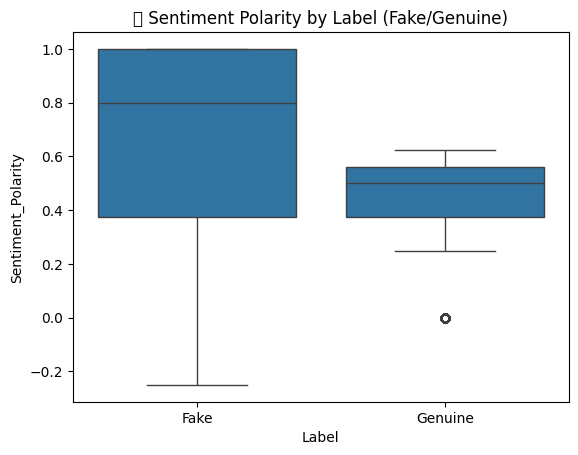

<ipython-input-33-74003dca4aef>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Label', y='Review_Word_Count', data=df, palette='pastel')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128214 (\N{OPEN BOOK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


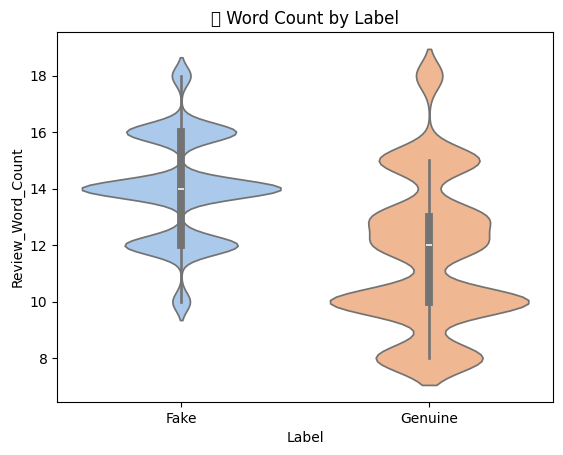

In [ ]:

# Sentiment vs Label
sns.boxplot(x='Label', y='Sentiment_Polarity', data=df)
plt.title("📊 Sentiment Polarity by Label (Fake/Genuine)")
plt.show()

# Word Count vs Label
sns.violinplot(x='Label', y='Review_Word_Count', data=df, palette='pastel')
plt.title("📖 Word Count by Label")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


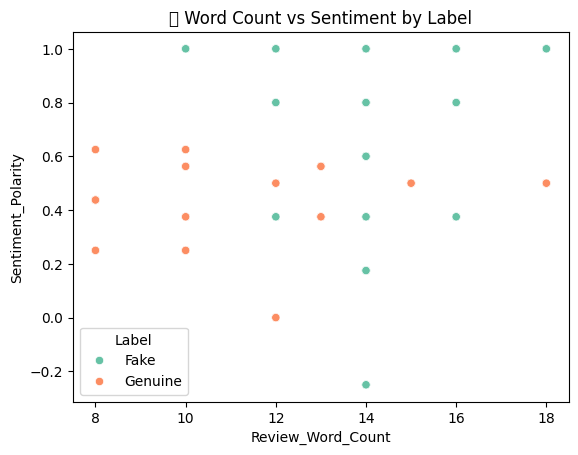

In [ ]:
# Scatter plot with hue for Label
sns.scatterplot(
    x='Review_Word_Count',
    y='Sentiment_Polarity',
    hue='Label',
    data=df,
    palette='Set2'
)
plt.title("🔎 Word Count vs Sentiment by Label")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


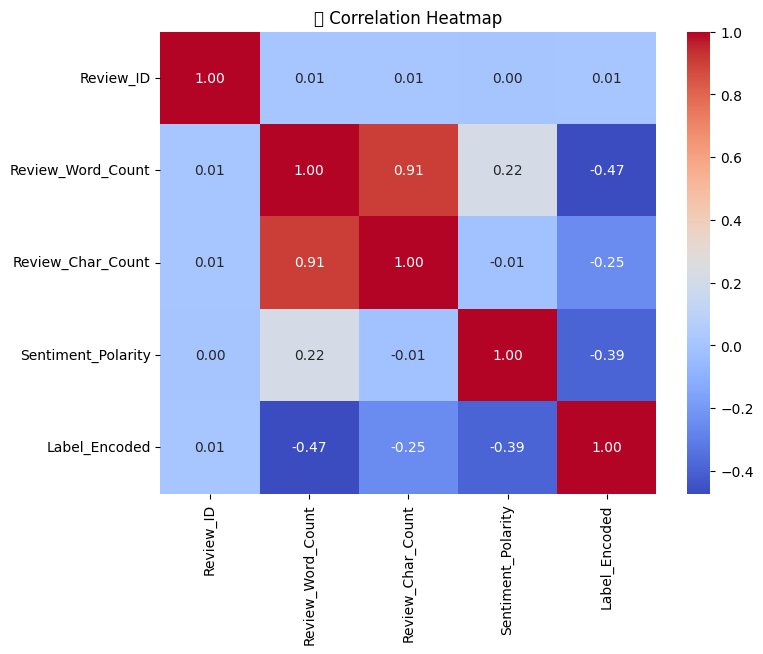

In [ ]:
# Keep numeric features only
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("🔥 Correlation Heatmap")
plt.show()
